In [41]:
from utils import *
debug = True

In [42]:
## background distribution
all_events = [importpbdatapandas(i) for i in range(0, 22948)]

In [43]:
def background_distribution(event1, event2):
    philist = np.array([])
    etalist = np.array([])
    for i in range(len(event1)):
        #hold index0 for first event, and traverse second event
        for j in range(len(event2)):
            dphi = event1["phi"][i] - event2["phi"][j]
            if dphi > np.pi:
                dphi = dphi - 2*np.pi
            if dphi < -np.pi:
                dphi = dphi + 2*np.pi
            deta = event1["eta"][i] - event2["eta"][j]
            philist = np.append(philist, dphi)
            etalist = np.append(etalist, deta)

    df = pd.DataFrame(np.vstack([philist,etalist]).T,columns=['phi','eta'])
    df = pd.concat([df, -1*df], ignore_index=True)

    return df

In [67]:
def background_range(start,end): #简单测试用的: 连续的 different event difference
    # 01,12,23,34....
    if start > end or start < 0 or start > 22947 or end < 0 or end > 22947:
        print("index error")
        return
    
    df = background_distribution(all_events[start], all_events[start+1])
    start += 1
    while start+1 <= end:
        event1 = all_events[start]
        event2 = all_events[start+1]
        temp = background_distribution(event1, event2)
        df = pd.concat([df, temp], ignore_index=True)
        start += 1

    return df
    

In [70]:
def background_range_pro(start, end): #老师让我们去搞的 ： 任意的different event difference
    #01,02,03,04, 12,13,14, 23,34
    if start > end or start < 0 or start > 22947 or end < 0 or end > 22947:
        print("index error")
        return
    
    current1idx = 0
    current2idx = 1
    print("now processing index: ",current1idx, current2idx) 
    df = background_distribution(all_events[start], all_events[start+1])
    current2idx += 1
    while current1idx <= end-1:
        while current2idx <= end:
            print("now processing index: ",current1idx, current2idx)
            event1 = all_events[current1idx]
            event2 = all_events[current2idx]
            temp = background_distribution(event1, event2)
            df = pd.concat([df, temp], ignore_index=True)
            current2idx += 1
        current1idx += 1
        current2idx = current1idx + 1

    return df


In [45]:
def surfacedata(dfdata, dx = 0.5, dy = 0.5, rangex=3.15, rangey=4):
    phi_c = math.ceil(rangex*2/dx)
    eta_c = math.ceil(rangey*2/dy)
    phi_data = np.arange(-rangex, rangex, dx)+dx/2
    eta_data = np.arange(-rangey, rangey, dy)+dy/2
    z_data = np.zeros([phi_c, eta_c], dtype=int)
    for index,instance in dfdata.iterrows():
        if instance['phi'] >= rangex or instance['phi'] <= -rangex or instance['eta'] >= rangey or instance['eta'] <= -rangey:
            continue
        phi_index = math.floor((instance['phi']+rangex)/dx) 
        eta_index = math.floor((instance['eta']+rangey)/dy)
        z_data[phi_index][eta_index] += 1
    return phi_data, eta_data, z_data.T

In [71]:
mixed_event0to5 = background_range_pro(0,5)

now processing index:  0 1
now processing index:  0 2
now processing index:  0 3
now processing index:  0 4
now processing index:  0 5
now processing index:  1 2
now processing index:  1 3
now processing index:  1 4
now processing index:  1 5
now processing index:  2 3
now processing index:  2 4
now processing index:  2 5
now processing index:  3 4
now processing index:  3 5
now processing index:  4 5


In [72]:
mixed_x, mixed_y, mixed_z = surfacedata(mixed_event0to5, 0.25, 0.5, 3.15, 6)

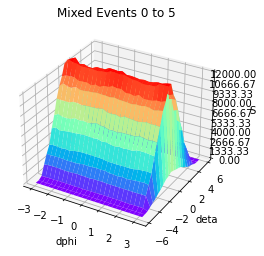

In [75]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = mixed_x
Y = mixed_y
X, Y = np.meshgrid(X, Y)
Z = mixed_z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 12000)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('dphi')
ax.set_ylabel('deta')
ax.set_zlabel('S')
plt.title('Mixed Events 0 to 5')

# Add a color bar which maps values to colors.
plt.savefig('SavedFig/mixed0to5.png')
plt.show()